In [1]:
from spreco.common import utils
from spreco.sampler import sampler
import numpy as np

2023-03-31 17:59:07.505694: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
log_path   = '/home/gluo/workspace/nlinv_prior/logs/20230331-115637'
model_path = log_path+'/sde_abide_300'
config     = utils.load_config(log_path+'/config.yaml')
save_intermediate=False

a_sampler     = sampler(config, target_snr=0.15, skip=1)
a_sampler.init_sampler(model_path, gpu_id='3')

2023-03-31 17:59:19.597000: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-03-31 17:59:19.683521: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:c1:00.0 name: A100-SXM-80GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 79.35GiB deviceMemoryBandwidth: 1.85TiB/s
2023-03-31 17:59:19.683547: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-03-31 17:59:19.687719: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-03-31 17:59:19.687784: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-03-31 17:59:19.688930: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
20

INFO:tensorflow:Restoring parameters from /home/gluo/workspace/nlinv_prior/logs/20230331-115637/sde_abide_300


In [3]:
grid_x=5
grid_y=5
samples_n, samples  = a_sampler.pc_sampler(grid_x*grid_y, 2)

if save_intermediate:
    utils.writecfl('/scratch/gluo/pc_samples_mp', utils.float2cplx(np.array(samples)))
    utils.writecfl('/scratch/gluo/pc_samples_n_mp', utils.float2cplx(np.array(samples_n)))

images = samples_n[-1]
images = np.abs(utils.float2cplx(images))

  0%|          | 0/100 [00:00<?, ?it/s]2023-03-31 17:59:29.908404: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-03-31 17:59:33.415407: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8302
2023-03-31 17:59:33.448742: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-03-31 17:59:33.451199: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-03-31 17:59:33.451262: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
100%|██████████| 100/100 [02:01<00:00,  1.22s/it]


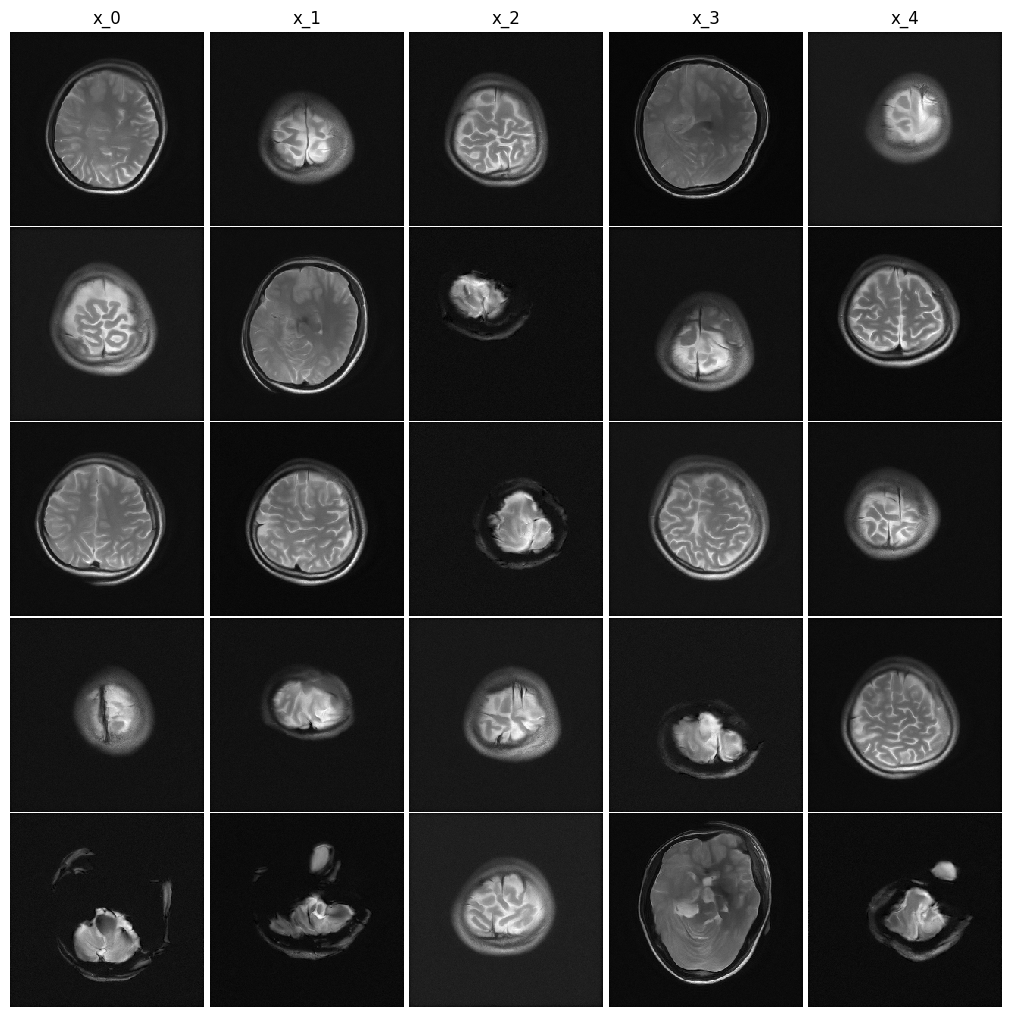

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from functools import partial

def subplot(ax, img, title, cmap, interpolation, vmin, vmax):
    ax.imshow(img, cmap=cmap, interpolation=interpolation, vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.axis('off')


plot_params = {'cmap': 'gray', 'interpolation': 'none', 'vmin': 0}
axplot      = partial(subplot, **plot_params)

fig, axss = plt.subplots(grid_x, grid_y, figsize=(10, 10), gridspec_kw={'width_ratios': [1  for _ in range(grid_x)]})
for i in range(grid_x):
    for j in range(grid_y):
        if i==0:
            strs='x_%d'%j
        else:
            strs=''
        axplot(axss[i,j], images[i*grid_y+j], title=strs, vmax=np.max(images[i*grid_y+j]))
plt.tight_layout(pad=.1)

In [10]:
grid_x=5
grid_y=5
a_sampler.steps=3
samples_n, samples  = a_sampler.ancestral_sampler(grid_x*grid_y, 1)

if save_intermediate:
    utils.writecfl('/scratch/gluo/pc_samples_mp', utils.float2cplx(np.array(samples)))
    utils.writecfl('/scratch/gluo/pc_samples_n_mp', utils.float2cplx(np.array(samples_n)))

images = samples[-1]
images = np.abs(utils.float2cplx(images))


100%|██████████| 100/100 [00:36<00:00,  2.71it/s]


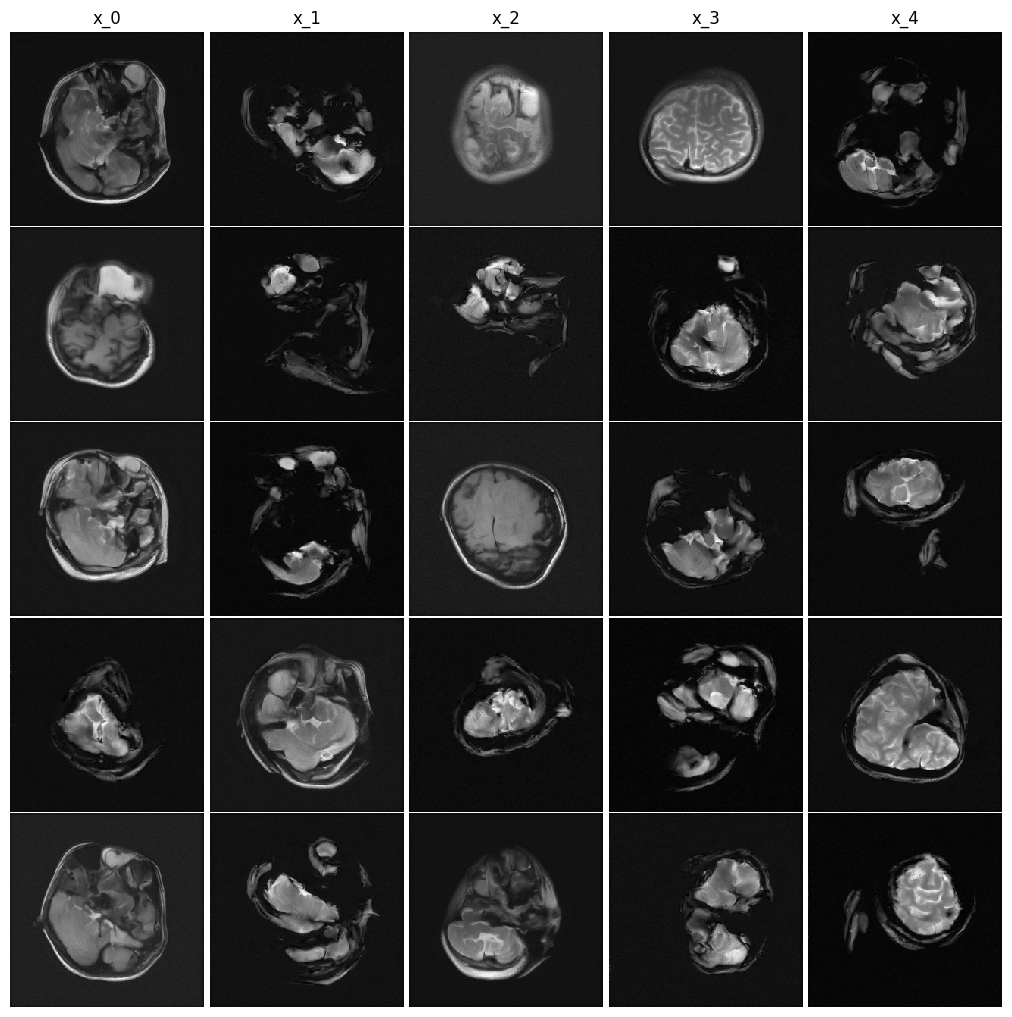

In [12]:
fig, axss = plt.subplots(grid_x, grid_y, figsize=(10, 10), gridspec_kw={'width_ratios': [1  for _ in range(grid_x)]})
for i in range(grid_x):
    for j in range(grid_y):
        if i==0:
            strs='x_%d'%j
        else:
            strs=''
        axplot(axss[i,j], images[i*grid_y+j], title=strs, vmax=np.max(images[i*grid_y+j]))
plt.tight_layout(pad=.1)